In [98]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

In [99]:
# Reading/Importing the dataset into work environment 
df= pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [100]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [101]:
# Getting Meta Data Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [102]:
# Checking for Null Values 
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**The Dataset is clean with no null values**

In [103]:
# Checking number unique variable for each feature
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [104]:
# Getting Descriptive statistics about 
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# UNIVARIATE ANALYSIS

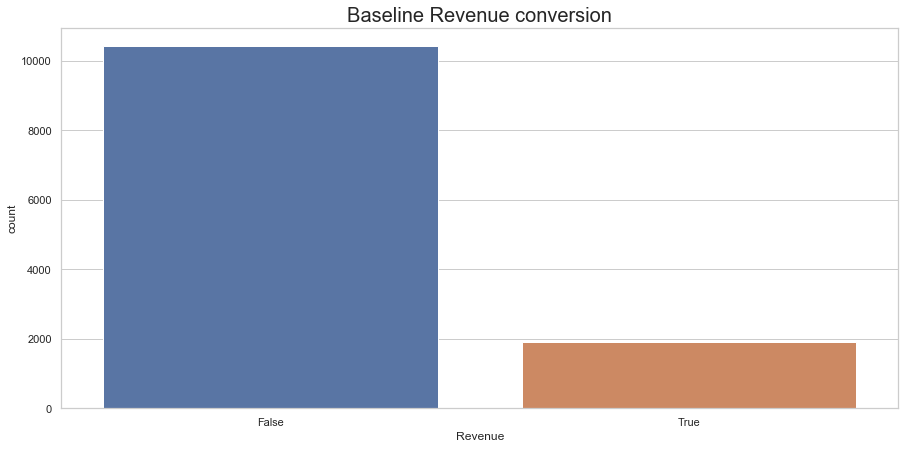

In [105]:
sns.countplot(df['Revenue'])
plt.title('Baseline Revenue conversion', fontsize = 20)
plt.show()

In [106]:
print(df['Revenue'].value_counts())
print()
print(df['Revenue'].value_counts(normalize=True))

False    10422
True      1908
Name: Revenue, dtype: int64

False    0.845255
True     0.154745
Name: Revenue, dtype: float64


### The given dataset is highly imbalanced with revenue not being generated at 84.5% .

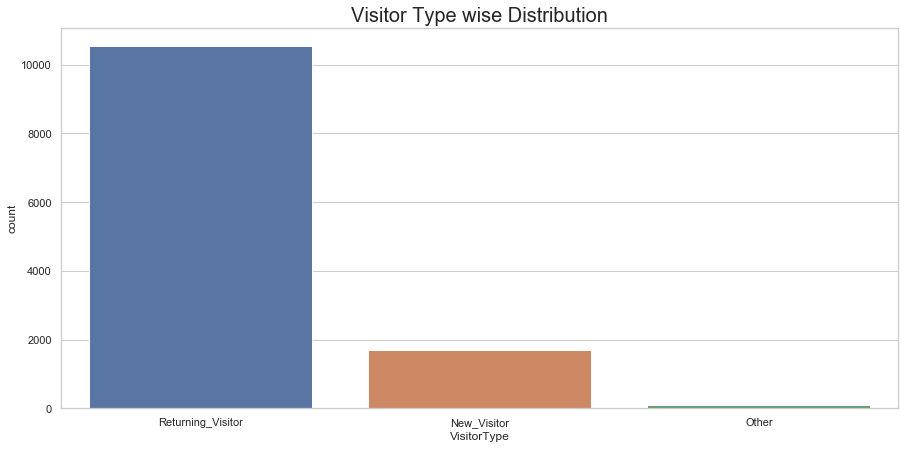

In [107]:
sns.countplot(df['VisitorType'])
plt.title('Visitor Type wise Distribution', fontsize = 20)
plt.show()

In [108]:
print(df['VisitorType'].value_counts())
print()
print(df['VisitorType'].value_counts(normalize=True))

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

Returning_Visitor    0.855718
New_Visitor          0.137388
Other                0.006894
Name: VisitorType, dtype: float64


#### Eventhough number of returning customer to the website are high, revenue conversion rate is low  .

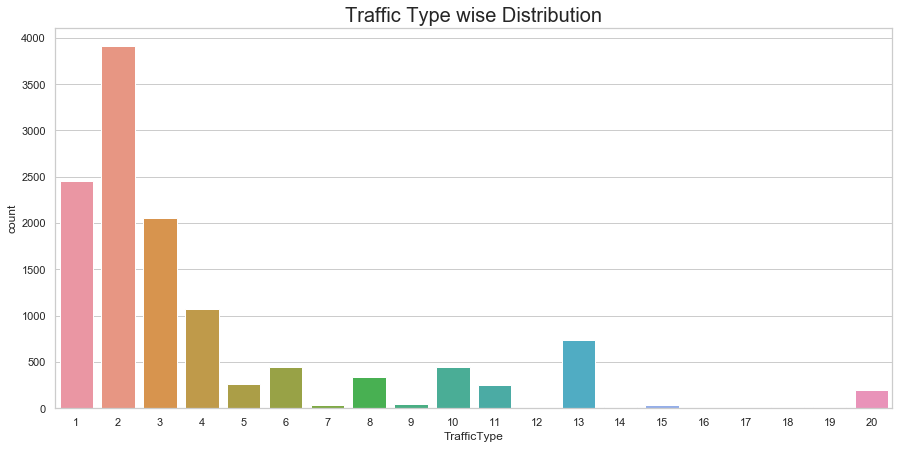

In [109]:
sns.countplot(df['TrafficType'])
plt.title('Traffic Type wise Distribution', fontsize = 20)
plt.show()

In [110]:
print(df['TrafficType'].value_counts())
print()
print(df['TrafficType'].value_counts(normalize=True))

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

2     0.317356
1     0.198783
3     0.166423
4     0.086699
13    0.059854
10    0.036496
6     0.036010
8     0.027818
5     0.021087
11    0.020032
20    0.016058
9     0.003406
7     0.003244
15    0.003082
19    0.001379
14    0.001054
18    0.000811
16    0.000243
12    0.000081
17    0.000081
Name: TrafficType, dtype: float64


### 77% of web traffic is generated by 4 sources 


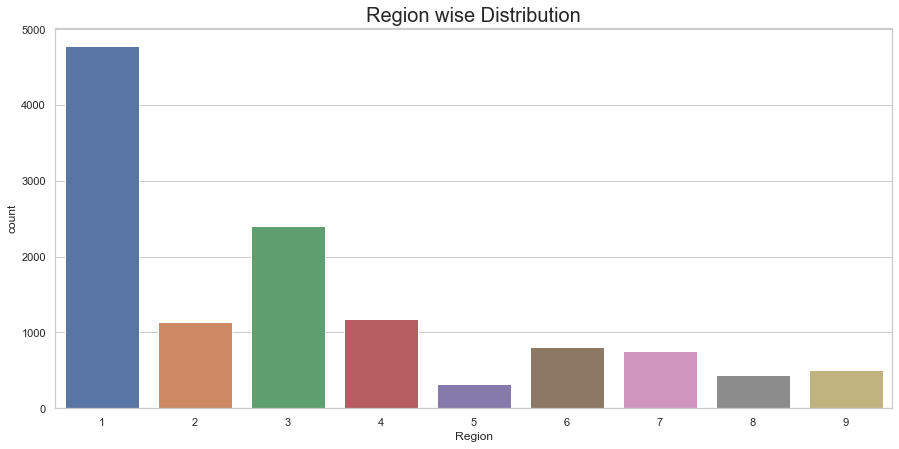

In [111]:
sns.countplot(df['Region'])
plt.title('Region wise Distribution', fontsize = 20)
plt.show()

In [112]:
print(df['Region'].value_counts())
print()
print(df['Region'].value_counts(normalize=True))

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

1    0.387672
3    0.194891
4    0.095864
2    0.092133
6    0.065288
7    0.061719
9    0.041444
8    0.035199
5    0.025791
Name: Region, dtype: float64


### Region 1 & 3 create 50% online session





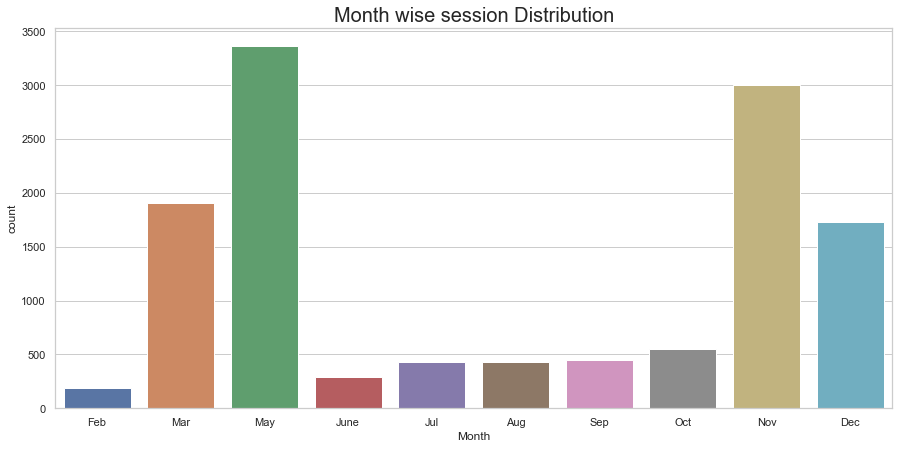

In [113]:
sns.countplot(df['Month'],order=['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Month wise session Distribution', fontsize = 20)
plt.show()

In [114]:
print(df['Month'].value_counts())
print()
print(df['Month'].value_counts(normalize=True))

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

May     0.272830
Nov     0.243147
Mar     0.154663
Dec     0.140065
Oct     0.044526
Sep     0.036334
Aug     0.035118
Jul     0.035036
June    0.023358
Feb     0.014923
Name: Month, dtype: float64


### May and November month create lot of web traffic . These months needs to concentrated for higher revenue generation

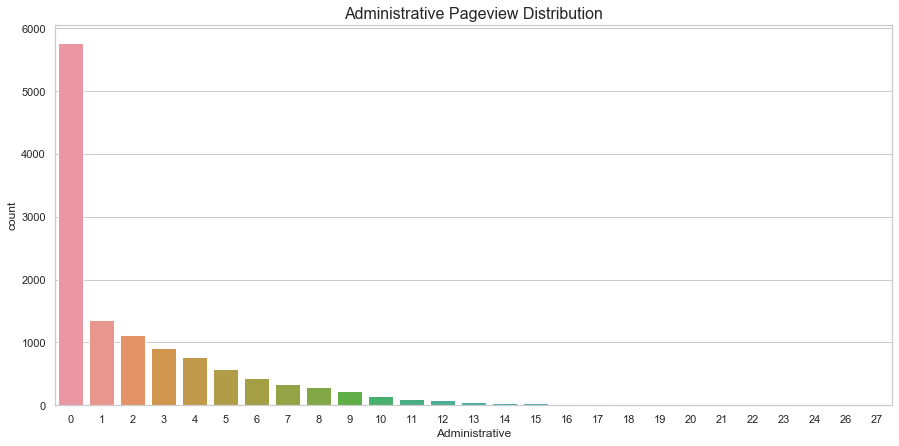

In [115]:
sns.countplot(df['Administrative'])
plt.title('Administrative Pageview Distribution', fontsize = 16)
plt.show()

In [116]:
print(df['Administrative'].value_counts())
print()
print(df['Administrative'].value_counts(normalize=True))

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
20       2
21       2
26       1
27       1
Name: Administrative, dtype: int64

0     0.467802
1     0.109813
2     0.090349
3     0.074209
4     0.062044
5     0.046634
6     0.035036
7     0.027413
8     0.023277
9     0.018248
10    0.012409
11    0.008516
12    0.006975
13    0.004542
14    0.003569
15    0.003082
16    0.001946
17    0.001298
18    0.000973
19    0.000487
24    0.000324
22    0.000324
23    0.000243
20    0.000162
21    0.000162
26    0.000081
27    0.000081
Name: Administrative, dtype: float64


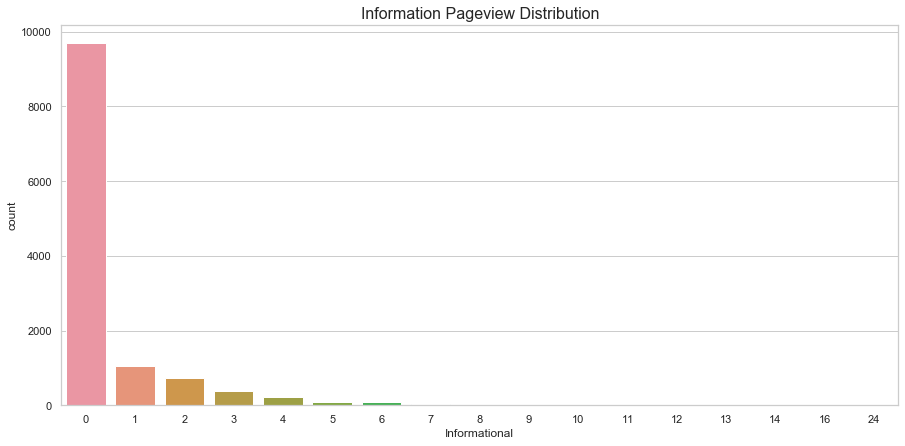

In [117]:
sns.countplot(df['Informational'])
plt.title('Information Pageview Distribution', fontsize = 16)
plt.show()

In [118]:
print(df['Informational'].value_counts())
print()
print(df['Informational'].value_counts(normalize=True))

0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
11       1
13       1
24       1
16       1
Name: Informational, dtype: int64

0     0.786618
1     0.084428
2     0.059043
3     0.030819
4     0.018005
5     0.008029
6     0.006326
7     0.002920
9     0.001217
8     0.001135
10    0.000568
12    0.000406
14    0.000162
11    0.000081
13    0.000081
24    0.000081
16    0.000081
Name: Informational, dtype: float64


### 79% of customers are not going to any information page

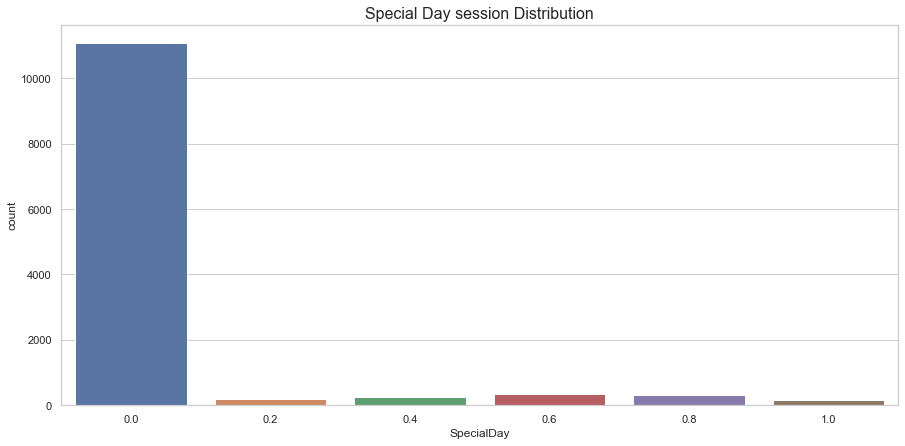

In [119]:
sns.countplot(df['SpecialDay'])
plt.title('Special Day session Distribution', fontsize = 16)
plt.show()

In [120]:
print(df['SpecialDay'].value_counts())
print()
print(df['SpecialDay'].value_counts(normalize=True))

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

0.0    0.898540
0.6    0.028467
0.8    0.026358
0.4    0.019708
0.2    0.014436
1.0    0.012490
Name: SpecialDay, dtype: float64


#### 90% of session happened during non special day , showing there is no affinity of web traffic towards special day.

# Bivariate Analysis

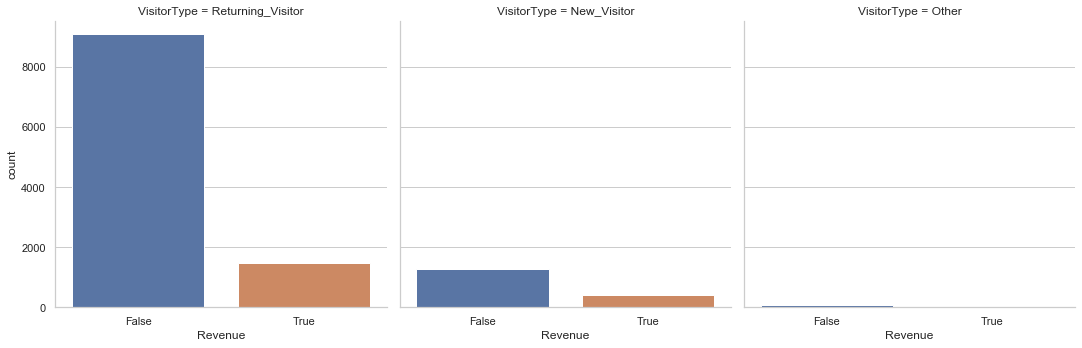

In [121]:
g = sns.catplot("Revenue", col="VisitorType", col_wrap=3,data=df,kind="count", height=5, aspect=1)
plt.show()

#### More revenue conversion is done by Returning customer.

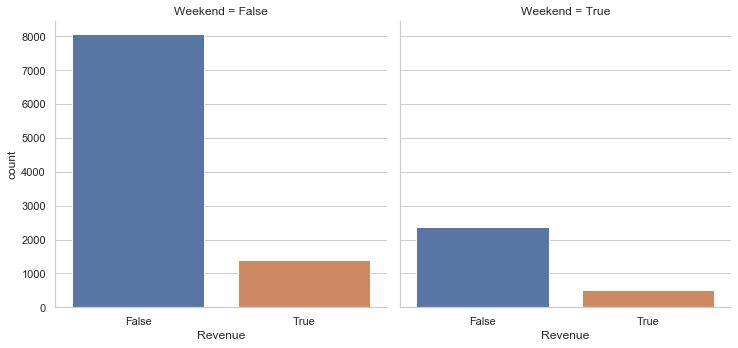

In [122]:
g = sns.catplot("Revenue", col="Weekend", col_wrap=3,data=df,kind="count", height=5, aspect=1)

### More revenue conversion is done on weekday.

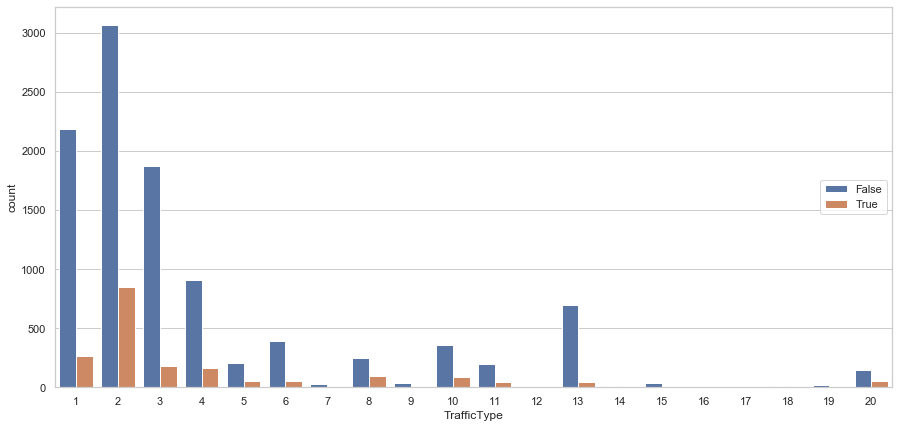

In [123]:
sns.countplot(x="TrafficType", hue="Revenue", data=df)
plt.legend(loc='right')
plt.show()

### More revenue conversion is done through the webtraffic generated from the source 2 . Eventhough source 13 generated considerable amount of webtraffic successful conversion is very low when compared to others.

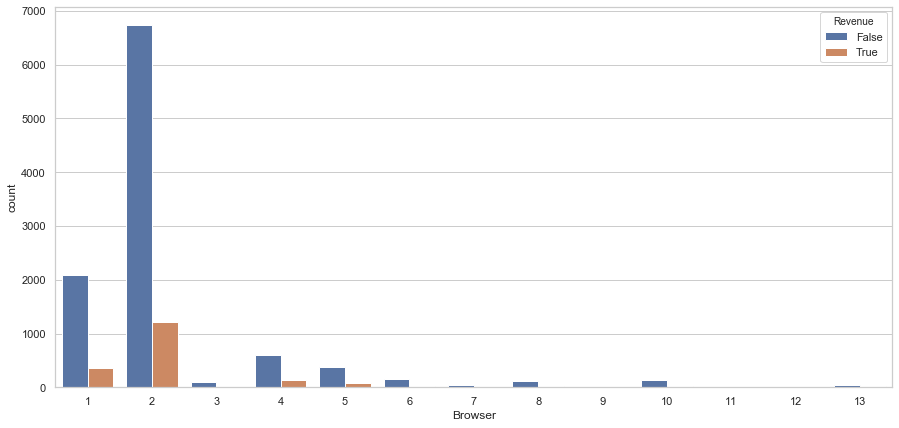

In [124]:
sns.countplot(x="Browser", hue="Revenue", data=df)
plt.show()

###  More revenue generating transaction happened from Browser 2. Event though Browser 1 create considerable number of sessions the conversion is low.


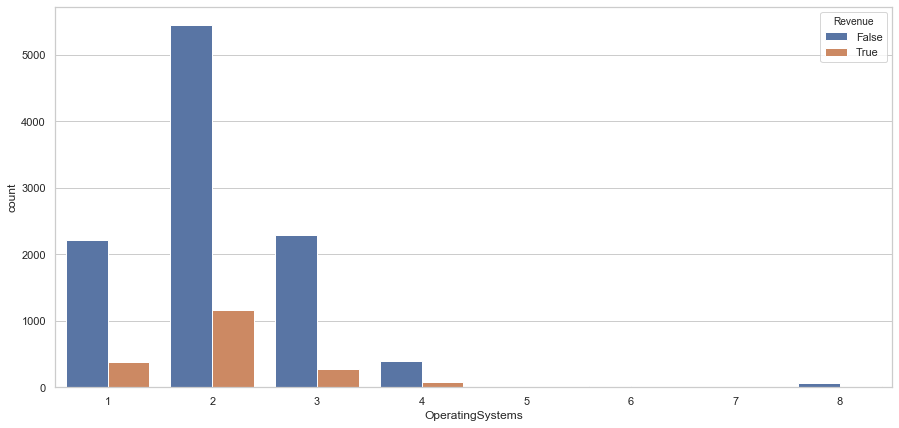

In [125]:
sns.countplot(x="OperatingSystems", hue="Revenue", data=df)
plt.show()

###  More revenue generating transaction happened from OS 2. 

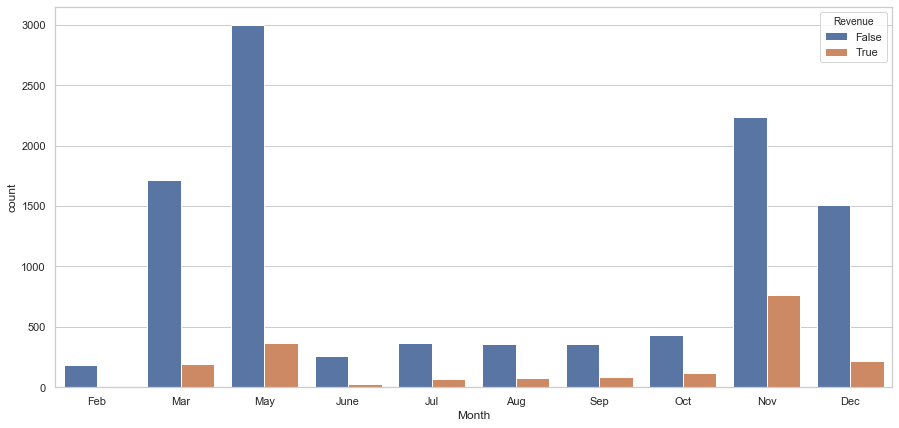

In [126]:
sns.countplot(x="Month", hue="Revenue", data=df,order=['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

### Website visitors may be high in May,but actual Sales conversion took place in the month of November. 

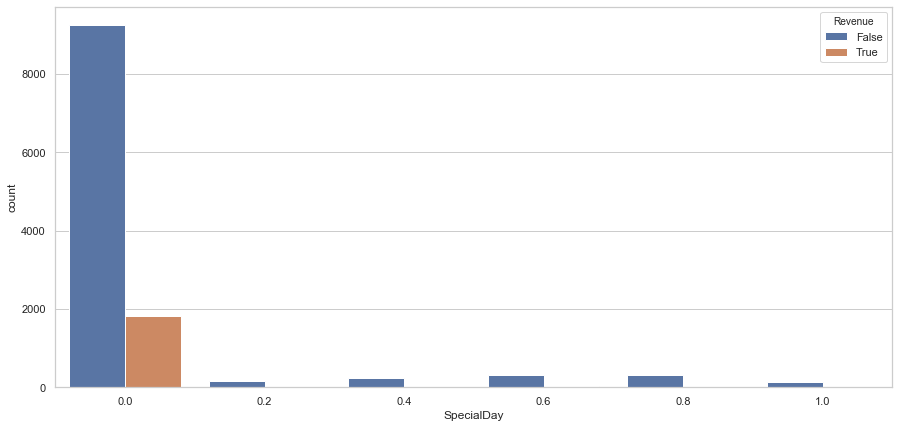

In [127]:
sns.countplot(x="SpecialDay", hue="Revenue", data=df)
plt.show()

### More number of online transaction happen during non-special day . It seems there is no relation between specialday and customer online transaction. 

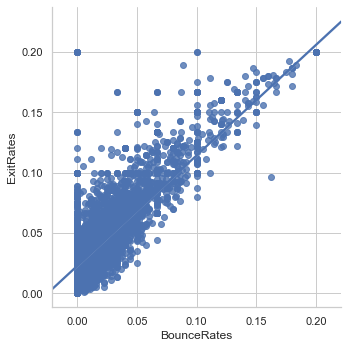

In [128]:
sns.set(style="whitegrid")
ax = sns.lmplot(x="BounceRates", y="ExitRates", data=df)

### There is a positive correlation between Bounce Rate and Exit Rate . With increase in Bounce Rate the exit rate of page increases

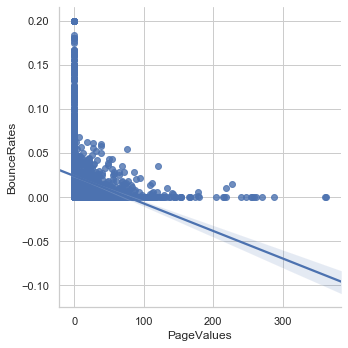

In [129]:
sns.set(style="whitegrid")
ax = sns.lmplot(x="PageValues", y="BounceRates" , data=df)

### There is a Negative correlation between Page Value and Bounce Rate . Web pages with better  Page value the exit rate reduces .

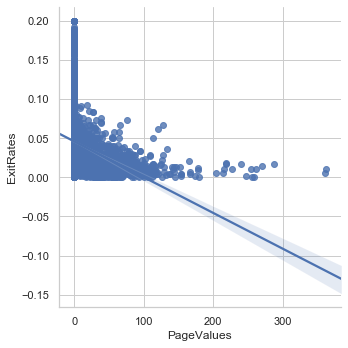

In [130]:
sns.set(style="whitegrid")
ax = sns.lmplot(x="PageValues", y="ExitRates" , data=df)

### There is a Negative correlation between Page Value and Exit Rate . Web pages with better Page value have a lower exit rate.

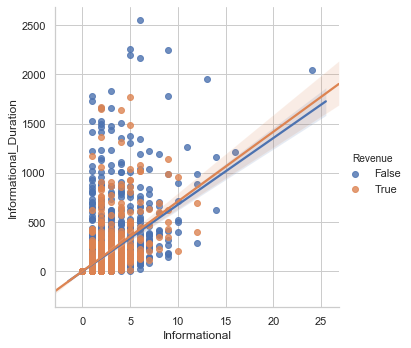

In [131]:
sns.set(style="whitegrid")
ax = sns.lmplot(x="Informational", y="Informational_Duration",hue='Revenue', data=df)

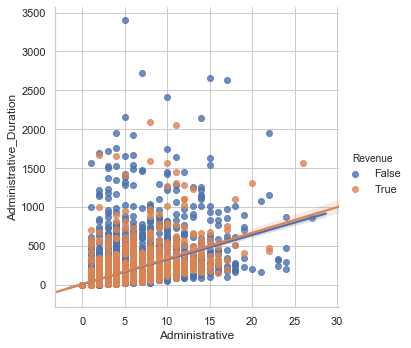

In [132]:
sns.set(style="whitegrid")
ax = sns.lmplot(x="Administrative", y="Administrative_Duration",hue='Revenue', data=df)

## K-means Clustering 

In [133]:
# Clustering Informational duration vs Bounce Rate

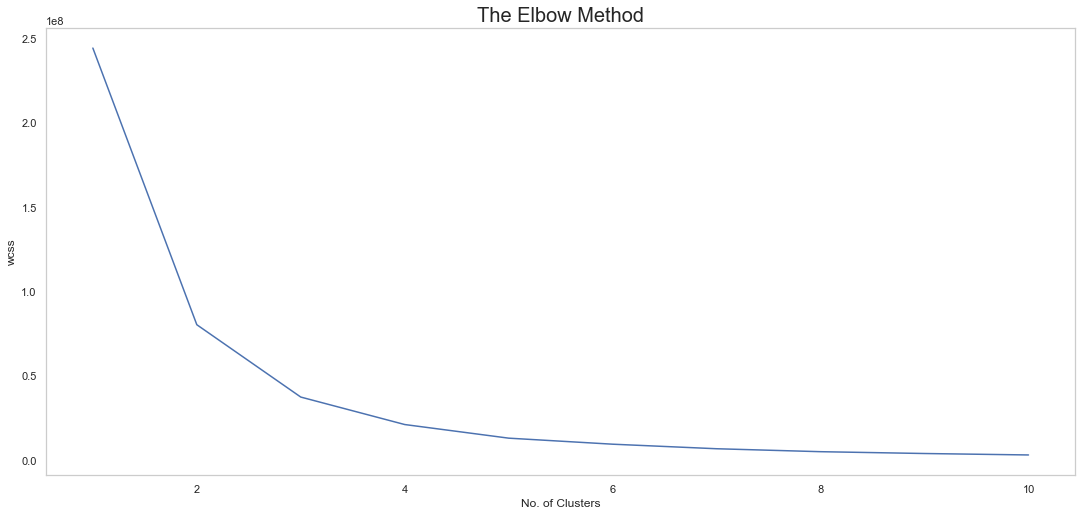

In [134]:
x = df.iloc[:, [3, 6]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

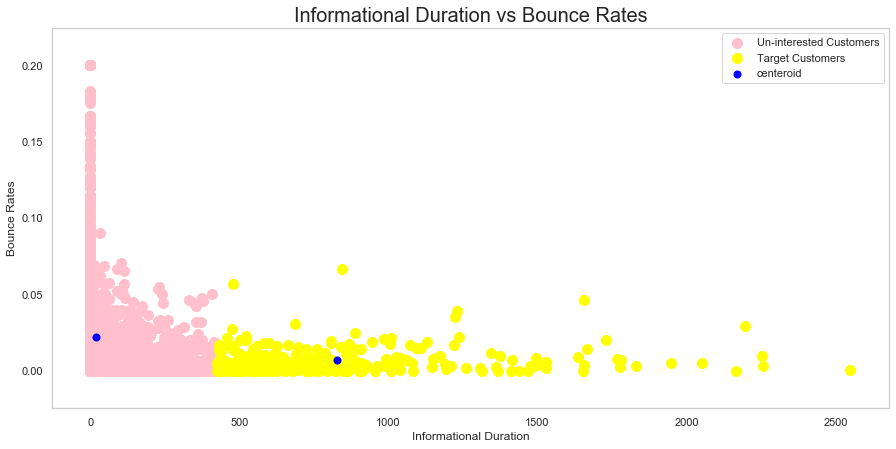

In [135]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

In [136]:
# informational duration vs exit rate

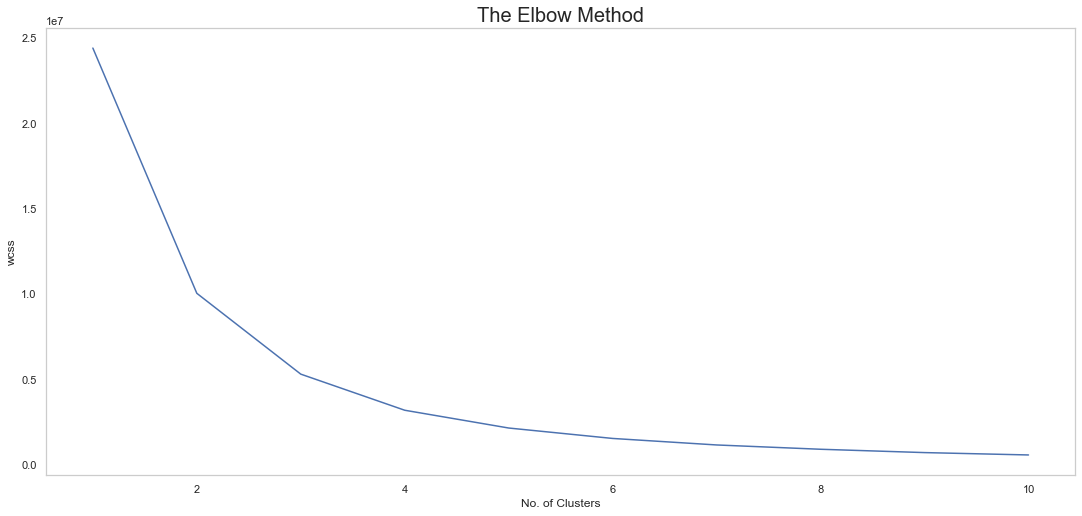

In [137]:
x = df.iloc[:, [4, 7]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

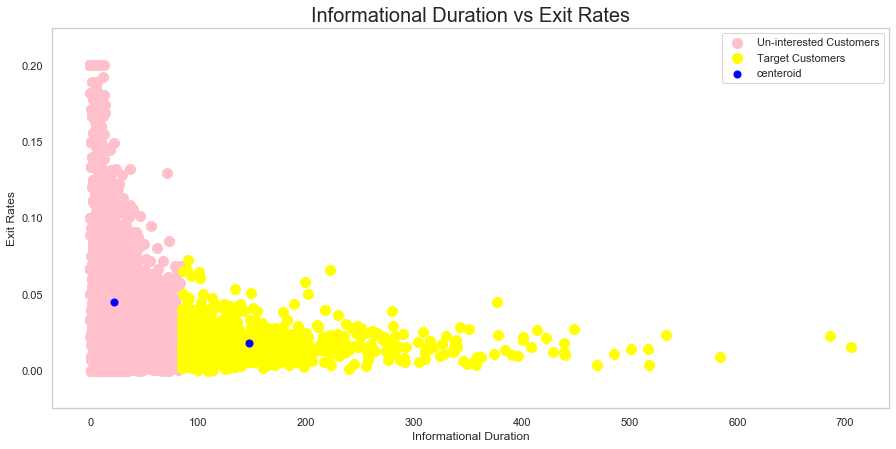

In [138]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Informational Duration vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()